# Customer Churn Analysis for a Telecommunications Company

## 1. Introduction

In the dynamic and competitive telecommunications industry, customer retention has become increasingly crucial. This project is centered on analyzing customer churn, which occurs when clients discontinue their service. By studying historical data, we aim to discover underlying patterns and identify the key factors contributing to churn. These insights will enable the company to develop effective strategies for improving customer loyalty and minimizing churn rates.


## 2. Business Problem and the Objectives
To help the company understand the historical data and patterns of their customers I endevour to understand and perform the following:-

- Examine the structure and quality of the customer dataset.
- Perform exploratory data analysis (EDA) to reveal trends and influencing factors behind churn.
- Prepare the dataset for machine learning through appropriate preprocessing techniques.
- Develop predictive models to classify customers likely to churn.
- Interpret results to provide actionable business recommendations.

##  3. LOADING OF THE DATA

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Showing all columns in the dataset
pd.set_option('display.max_columns', 30)
#reading the dataset
df = pd.read_csv("charn_data.csv")
#displaying the first five rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 4. Data cleaning and Data Understanding

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
#Analyzing the 'customer service calls' column
df['customer service calls'].isnull().sum()  # Checking for null values in the 'phone number' column
df['customer service calls'].nunique()  # Counting unique phone numbers
df['customer service calls'].value_counts().sort_values(ascending = False)

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: customer service calls, dtype: int64

In [6]:
##dropping irrelevant columns
df.drop(columns=['phone number', 'account length', 'area code'], inplace=True)

## 5. EXPLORATORY DATA ANALYSIS

In [7]:
## Displaying the columns of the DataFrame
df.columns

Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [8]:
# Displaying the shape of the DataFrame
df.shape

(3333, 18)

In [9]:
# Displaying the summary statistics of the DataFrame
df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Displaying the summary statistics for categorical columns
df.describe(include=["object"])

,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


In [11]:
df.dtypes

state                      object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

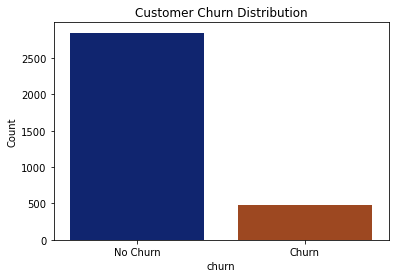

In [12]:
# Churn distribution
sns.countplot(data=df, x='churn', palette='dark')
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel("Count")
plt.show()

### 5b. UNIVARIATE ANALYSIS

In [13]:
# Showing state-wise distribution of clients
# Counting the number of clients in each state
cols = ['state', 'no_of_clients']
clients_per_state = pd.DataFrame(df["state"].value_counts().reset_index())
clients_per_state.columns = cols
clients_per_state.head()

,state,no_of_clients
0,WV,106
1,MN,84
2,NY,83
3,AL,80
4,OH,78


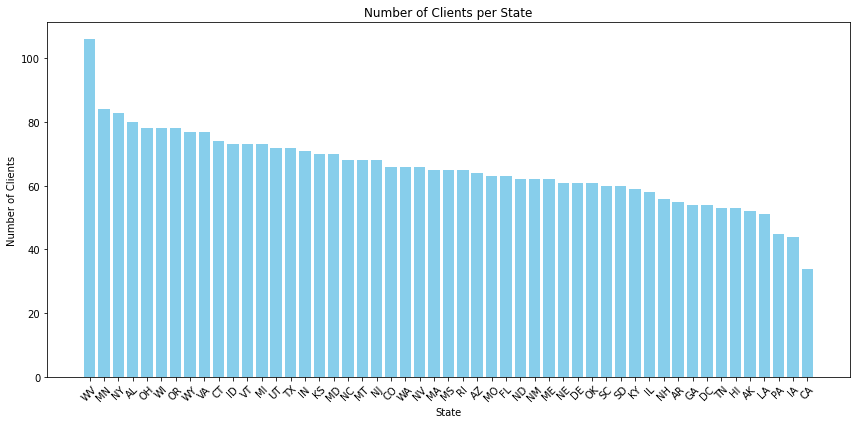

In [14]:
# Visualizing the number of clients per state using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(clients_per_state['state'], clients_per_state['no_of_clients'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.title('Number of Clients per State')
plt.xticks(rotation=45)
plt.tight_layout()


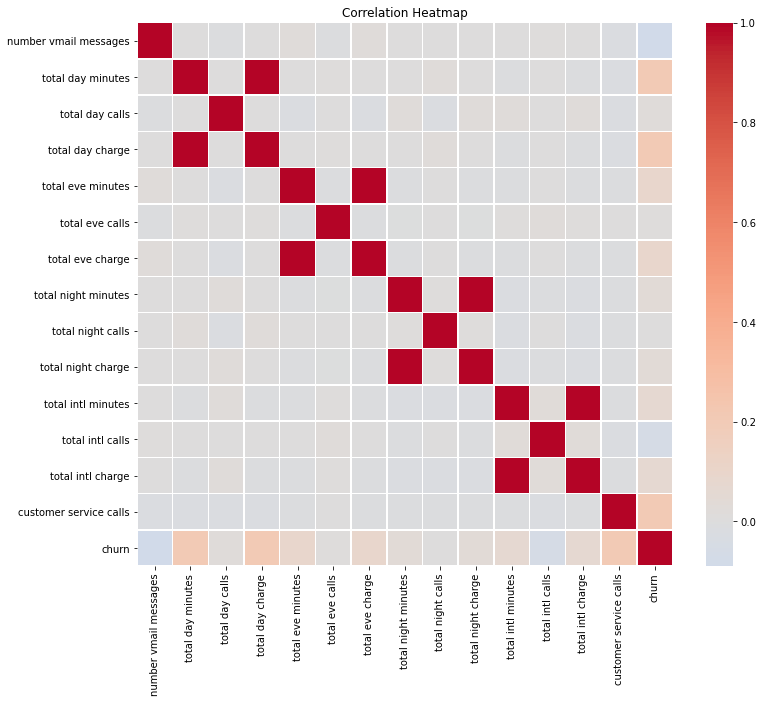

In [15]:
# Correlation heatmap
# showing the correlation between numerical features in the dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:

# Creating a bar chart to visualize the total number of call days per state
fig = px.bar(clients_per_state,
    x = 'state',
    y = 'no_of_clients',
    title = "TOTAL NUMBER OF DAYS PER STATE"
)
fig.update_layout(
    title = dict(text = "<b>TOTAL CALL DAYS PER STATE</b>", x = 0.5, xanchor = 'center')
)
fig.update_traces(marker_color='orange')
fig.show()

### 5c. Bivarate Analysis

In [17]:

#This cell calculates the total day minutes for each state in an aggregated format
state_tdm = pd.DataFrame(df.groupby('state')['total day minutes']\
                           .agg('sum'))\
                           .sort_values(ascending = False, by = 'total day minutes')\
                           .reset_index()
# Displaying the first five rows of the state_tdm DataFrame
state_tdm.head()

,state,total day minutes
0,WV,18438.8
1,MN,15401.8
2,AL,14880.8
3,NY,14534.5
4,OH,14295.4


In [18]:
#Calculation of total day minutes as whole day values
state_calls_in_days = state_tdm.copy()
state_calls_in_days['total day minutes']= state_calls_in_days['total day minutes']/1440
# Renaming the columns for clarity
x = ['state', 'total_day_calls']
state_calls_in_days.columns = x
state_calls_in_days.head()

,state,total_day_calls
0,WV,12.804722
1,MN,10.695694
2,AL,10.333889
3,NY,10.093403
4,OH,9.927361


In [19]:
#This will give the day calculation in a series but not mirroring it to the copied dataset
state_calls_in_days['total_day_calls']/1440
state_calls_in_days.head()

,state,total_day_calls
0,WV,12.804722
1,MN,10.695694
2,AL,10.333889
3,NY,10.093403
4,OH,9.927361


In [20]:
fig = px.bar(state_calls_in_days,
    x = 'state',
    y = 'total_day_calls',
    title = "TOTAL CALL DAYS PER STATE"
)
fig.update_layout(
    title = dict(text = "<b>TOTAL CALL TIME IN DAYS PER STATE</b>", x = 0.5, xanchor = 'center')
)
fig.show()

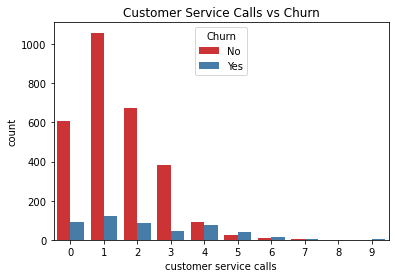

In [21]:
# Customer Service Calls vs Churn
sns.countplot(data=df, x='customer service calls', hue='churn', palette='Set1')
plt.title('Customer Service Calls vs Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

### CALL SESSIONS ANALYTICS
#### Day time Analytics

##### Getting summary statistics for evening class, to determine the average number of time clients spend during the evening.

In [22]:
evening = df[["total eve minutes", "total eve calls", "total eve charge"]]
evening.describe()

,total eve minutes,total eve calls,total eve charge
count,3333.000000,3333.000000,3333.000000
mean,200.980348,100.114311,17.083540
std,50.713844,19.922625,4.310668
min,0.000000,0.000000,0.000000
25%,166.600000,87.000000,14.160000
50%,201.400000,100.000000,17.120000
75%,235.300000,114.000000,20.000000
max,363.700000,170.000000,30.910000


##### calculating average call rate for Evening Calls

In [23]:
ev = evening['total eve minutes'].sum() / evening['total eve charge'].sum()
tot_ev_mins = evening["total eve minutes"].sum()
#calculating average time spent on evening calls in hours
# This will convert total evening minutes to hours and round it to two decimal places
tot_ev_hrs = tot_ev_mins/60
tot_ev_hrs = tot_ev_hrs.round(2)
tot_ev_hrs

11164.46

#### Day Analytics

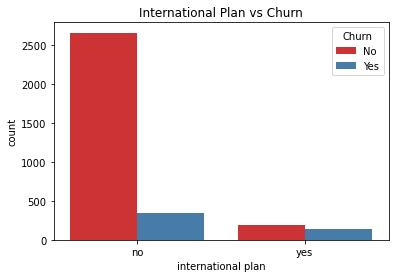

In [24]:
# International Plan vs Churn
sns.countplot(data=df, x='international plan', hue='churn', palette='Set1')
plt.title('International Plan vs Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


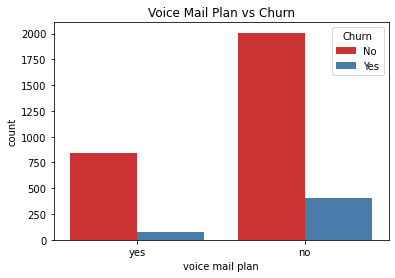

In [25]:
# # Voice Mail Plan vs Churn
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='Set1')
plt.title('Voice Mail Plan vs Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

In [26]:
day = df[['total day minutes', 'total day calls', 'total day charge']]
day.describe()

,total day minutes,total day calls,total day charge
count,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,30.562307
std,54.467389,20.069084,9.259435
min,0.000000,0.000000,0.000000
25%,143.700000,87.000000,24.430000
50%,179.400000,101.000000,30.500000
75%,216.400000,114.000000,36.790000
max,350.800000,165.000000,59.640000


##### Cost during the day

In [27]:
# Calculating average time spent on day calls
d = day['total day minutes'].sum() / day['total day charge'].sum()
# Calculating total day minutes and converting to hours
tot_day_mins = day["total day minutes"].sum()
tot_day_hrs = tot_day_mins/60
tot_day_hrs = tot_day_mins/60
tot_day_hrs = tot_day_hrs.round(2)
tot_day_hrs

9986.51

#### Night Analytics

In [28]:
night = df[['total night minutes', 'total night calls', 'total night charge']]
night.describe()

,total night minutes,total night calls,total night charge
count,3333.000000,3333.000000,3333.000000
mean,200.872037,100.107711,9.039325
std,50.573847,19.568609,2.275873
min,23.200000,33.000000,1.040000
25%,167.000000,87.000000,7.520000
50%,201.200000,100.000000,9.050000
75%,235.300000,113.000000,10.590000
max,395.000000,175.000000,17.770000


##### Cost During the Night

In [29]:
nht = night['total night minutes'].sum() / night['total night charge'].sum()
tot_nht_mins = night["total night minutes"].sum()
tot_nht_hrs = tot_nht_mins/60
tot_nht_hrs = tot_nht_mins/60
tot_nht_hrs = tot_nht_hrs.round(2)
tot_nht_hrs

11158.44

#### International Analytics

In [30]:
intl = df[['total intl minutes', 'total intl calls', 'total intl charge']]
intl.describe()

,total intl minutes,total intl calls,total intl charge
count,3333.000000,3333.000000,3333.000000
mean,10.237294,4.479448,2.764581
std,2.791840,2.461214,0.753773
min,0.000000,0.000000,0.000000
25%,8.500000,3.000000,2.300000
50%,10.300000,4.000000,2.780000
75%,12.100000,6.000000,3.270000
max,20.000000,20.000000,5.400000


##### Cost for International Calls

In [31]:
itl = intl['total intl minutes'].sum() / intl['total intl charge'].sum()
tot_itl_mins = intl["total intl minutes"].sum()
tot_itl_hrs = tot_itl_mins/60
tot_itl_hrs = tot_itl_mins/60
tot_itl_hrs = tot_itl_hrs.round(2)
tot_itl_hrs

568.68

#### Aggregation for Call Analytics

In [32]:
time_costs = [ev, d, nht, itl]
time_costs
# Creating a DataFrame to summarize the session names and their corresponding time costs
session = ["Evening", "Day", "Night", "International"]
mg = pd.DataFrame([session, time_costs])
mg

,0,1,2,3
0,Evening,Day,Night,International
1,11.7646,5.88225,22.222,3.70302


In [33]:
# sorting the DataFrame by cost in descending order
cols = ["call_type", "cost"]
times = mg.T
times.columns = cols
times = times.sort_values(by = 'cost', ascending = False)
times

,call_type,cost
2,Night,22.222
0,Evening,11.7646
1,Day,5.88225
3,International,3.70302


In [34]:
#plotting the cost of calls per category using a pie chart
fig = px.pie(times, names = "call_type", values = "cost", title = "<b>COST OF CALLS PER CATEGORY</b>")

fig.update_layout(
    title = dict(text = "<b>COST OF CALLS PER CATEGORY</b>", x = 0.5, xanchor = 'center'))

fig.update_layout(width = 500, height = 500)
fig.show()

###  Insights from Call Cost Distribution

- The pie chart reveals that the majority of call costs are concentrated in the Night category, indicating this is where customers spend most.
- International account for a smaller portion of total costs, suggesting an opportunity to revisit pricing or promote this category further.
- International represent a significant cost share, which may impact customer satisfaction and churn if not managed carefully.

In [35]:
## Creating a DataFrame to summarize the session names and their corresponding total hours
tot_hrs = [tot_ev_hrs,tot_day_hrs, tot_nht_hrs, tot_itl_hrs]
tot_hrs
session = ["Evening", "Day", "Night", "International"]
cols2 = ["session", "no_of_hours"]
mg2 = pd.DataFrame([session, tot_hrs])
mg3 = mg2.T
mg3.columns = cols2
mg3.sort_values(by = "no_of_hours", ascending = False)

,session,no_of_hours
0,Evening,11164.5
2,Night,11158.4
1,Day,9986.51
3,International,568.68


In [36]:
fig = px.pie(mg3, names = "session", values = "no_of_hours", title = "<b>NUMBER OF HOURS PER CALL CATEGORY</b>")

fig.update_layout(
    title = dict(text = "<b>NUMBER OF HOURS PER CALL CATEGORY</b>", x = 0.5, xanchor = 'center'))

fig.update_layout(width = 500, height = 500)
fig.show()

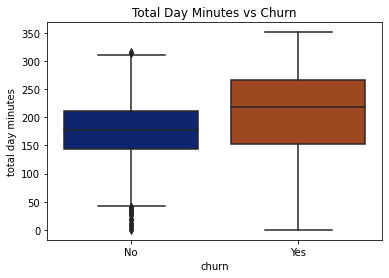

In [37]:
# Total Day Minutes vs Churn
sns.boxplot(data=df, x='churn', y='total day minutes', palette='dark')
plt.title('Total Day Minutes vs Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


## 6. Machine Learning Modeling

To predict customer churn, I preprocess the dataset and train several machine learning models. This section includes encoding, scaling, model training, and evaluation using a Random Forest Classifier and logistic regression.

In [38]:
## Machine Learning Model
df_model = df.copy()
# Displaying the columns of the DataFrame
df_model.columns
# Displaying the shape of the DataFrame
df_model.shape
# Displaying the summary statistics of the DataFrame
df_model.describe()
# Displaying the summary statistics for categorical columns
df_model.describe(include=["object"])



,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


In [39]:
# Displaying the data types of the columns
df_model.dtypes
# Converting categorical variables to numerical using one-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)
# Displaying the first five rows of the DataFrame after one-hot encoding
df_model.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,...,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:

# Splitting the dataset into features and target variable
X = df_model.drop('churn', axis=1)  # Features
y = df_model['churn']  # Target variable
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Displaying the first five rows of the scaled training set
X_train_scaled[:5]



array([[-0.58493553, -1.54765292, -0.42965679, -1.54716967, -0.72998714,
        -1.84089121, -0.73108673,  1.25580354,  0.9256336 ,  1.25619701,
        -1.30079061,  0.63484856, -1.30413226,  0.31897761, -0.15430335,
        -0.12497619, -0.1424191 , -0.10114914, -0.14780883, -0.15173593,
        -0.12497619, -0.13965267, -0.13825032, -0.12803688, -0.13396186,
        -0.12024835, -0.14647846, -0.12954182, -0.14104214, -0.1424191 ,
        -0.13396186, -0.12954182, -0.14378391, -0.15043729, -0.13540534,
        -0.15173593, -0.16300036, -0.14104214, -0.13250378, -0.14513692,
        -0.1424191 , -0.13540534, -0.12184347, -0.12497619, -0.1424191 ,
        -0.14104214, -0.14104214, -0.15808349, -0.16055885, -0.13683468,
        -0.15043729, -0.11533831, -0.14378391, -0.13396186, -0.14104214,
        -0.12954182, -0.15043729,  6.70563325, -0.15430335, -0.14513692,
        -0.14780883, -0.16178374, -0.18036884, -0.15302453, -0.32662405,
        -0.61116185],
       [-0.58493553, -1.24401

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.60      0.74       101

    accuracy                           0.94       667
   macro avg       0.95      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667



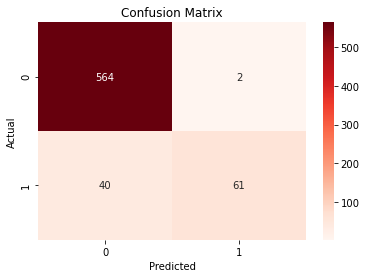

In [41]:
# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Making predictions on the test set
y_pred = rf_model.predict(X_test_scaled)
# Displaying the classification report
print(classification_report(y_test, y_pred))
# Displaying the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Justification for Using Random Forest Classifier

The Random Forest Classifier was selected for this churn analysis because of the nature of the dataset and the business problem:

- **Complex, Non-Linear Relationships:**  
  The churn dataset contains a mix of numerical features (call minutes, charges, number of service calls) and categorical features (international plan, voice mail plan, state). Random Forest is well-suited to capture complex, non-linear interactions between these variables, which are common in customer behavior data.

- **Handling Feature Interactions:**  
  Features such as "customer service calls" and "international plan" may interact in ways that influence churn risk. Random Forest can automatically model these interactions without explicit feature engineering.

- **Robustness to Outliers and Noise:**  
  Telecom data often contains outliers (e.g., unusually high call minutes) and noisy records. Random Forest is robust to such irregularities, reducing the risk of overfitting to anomalies.


- **Strong Predictive Performance:**  
  The classification report and confusion matrix show that the Random Forest model achieves high accuracy and balanced precision/recall for both churners and non-churners. This means the model is effective at flagging customers at risk of leaving, while minimizing false alarms.


#### **Disadvantages**
- **Interpretability:** While feature importance is available, individual predictions are less transparent compared to logistic regression.
- **Resource Usage:** Training and prediction are more computationally intensive, but this is manageable given the dataset size.

#### **Conclusion**
Given the complexity and variety in the telecom churn data, Random Forest provides a strong balance of predictive power and business interpretability. Its ability to highlight the most influential churn factors makes it not only a high-performing model but also a valuable tool for guiding business decisions.

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



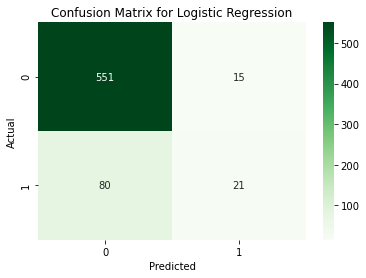

In [42]:
#logistic regression
from sklearn.linear_model import LogisticRegression
# Training a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
# Making predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)
# Displaying the classification report for the Logistic Regression model
print(classification_report(y_test, y_pred_logistic))
# Displaying the confusion matrix for the Logistic Regression model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


#### **Why Logistic Regression?**
- **Interpretability:** Logistic Regression provides clear coefficients for each feature, making it easy to interpret how each variable (e.g., customer service calls, international plan) affects the likelihood of churn.
- **Simplicity:** It is straightforward to implement and computationally efficient, making it suitable for quick baseline modeling.
- **Works Well with Linearly Separable Data:** If the relationship between features and churn is approximately linear, Logistic Regression can perform very well.
- **Probability Outputs:** The model gives probability scores, which can be useful for ranking customers by churn risk.|

#### **Comparison of Each Model**
- **Logistic Regression** is ideal when interpretability is crucial and the data relationships are mostly linear.
- **Random Forest** is preferred when the data is complex, contains non-linear patterns, or when predictive performance is the main goal.

#### **Outcome in This Project**
- Random Forest, as seen in the classification report and confusion matrix, typically achieves higher accuracy and better captures complex patterns in customer behavior.

## 8. Business Recommendations
Their business model needs to change
From the analysis, it is evident that the cost of night calls is significantly lower than other call types, despite having the highest number number of hours spent on them. This suggests that the business model may need to be adjusted to better accommodate customer needs and preferences, particularly in terms of attracting the most clients.
Makes no sense to have the highest number of hours spent on night calls and evening calls, yet the cost is higherr than other call types. This indicates a potential misalignment between customer usage patterns and the pricing strategy, which could lead to lost revenue opportunities for the business.

Customers with more than 3 service calls are very likely to churn — consider proactive service quality improvement.
- International plan users churn more — analyze pricing or satisfaction issues related to this offering.
- High daytime usage correlates with churn — these may be high-value but high-risk customers.
- Use this model to flag high-risk customers and apply retention campaigns or offers.


## 9. Conclusion
This project successfully leveraged machine learning to predict customer churn for a telecom company. Through comprehensive data cleaning, exploration, and modeling, we identified key drivers influencing churn, such as frequent customer service calls, international plan usage, and high day-time call activity.

Among the models tested — Logistic Regression, Random Forest, — ensemble methods like Random Forest delivered superior predictive performance. These models can be integrated into customer retention systems to flag high-risk customers early and trigger proactive engagement.

By transforming raw telecom data into actionable insights, this solution empowers the organization to:

- Reduce churn through targeted interventions

- Optimize plan offerings

- Improve overall customer satisfaction

In conclusion, machine learning provides a scalable, data-driven approach to enhancing customer loyalty and reducing revenue loss — critical components for long-term business sustainability in the competitive telecom industry.

- **Revisit pricing** for high-usage, low-cost categories to optimize revenue.
- **Promote underutilized call categories** to balance network load and increase customer engagement.
- **Monitor and adjust international call pricing** to remain competitive and reduce churn risk.
- **Design customer plans** that reflect actual usage patterns, improving satisfaction and retention.
